# Visualize Principal componets analysis (PCA)
Using Wine data set and Iris dataset

## Import Libraries and moudle

In [14]:
import os
import sys

# Lấy đường dẫn của thư mục hiện tại (notebook)
current_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(current_dir, '..')))

# Import module từ src
from src.utils import *

## Iris dataset

In [15]:
iris_data = load_csv('/Users/vominhthinh/Workspace/PCA from scratch/data/Iris.csv')

In [16]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [17]:
iris_data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [18]:
iris_data = iris_data.iloc[:, 1:]
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
# Standardize data
iris_data.iloc[:, 0:4] = standardize(iris_data.iloc[:, 0:4])

## Visualize original dimensions

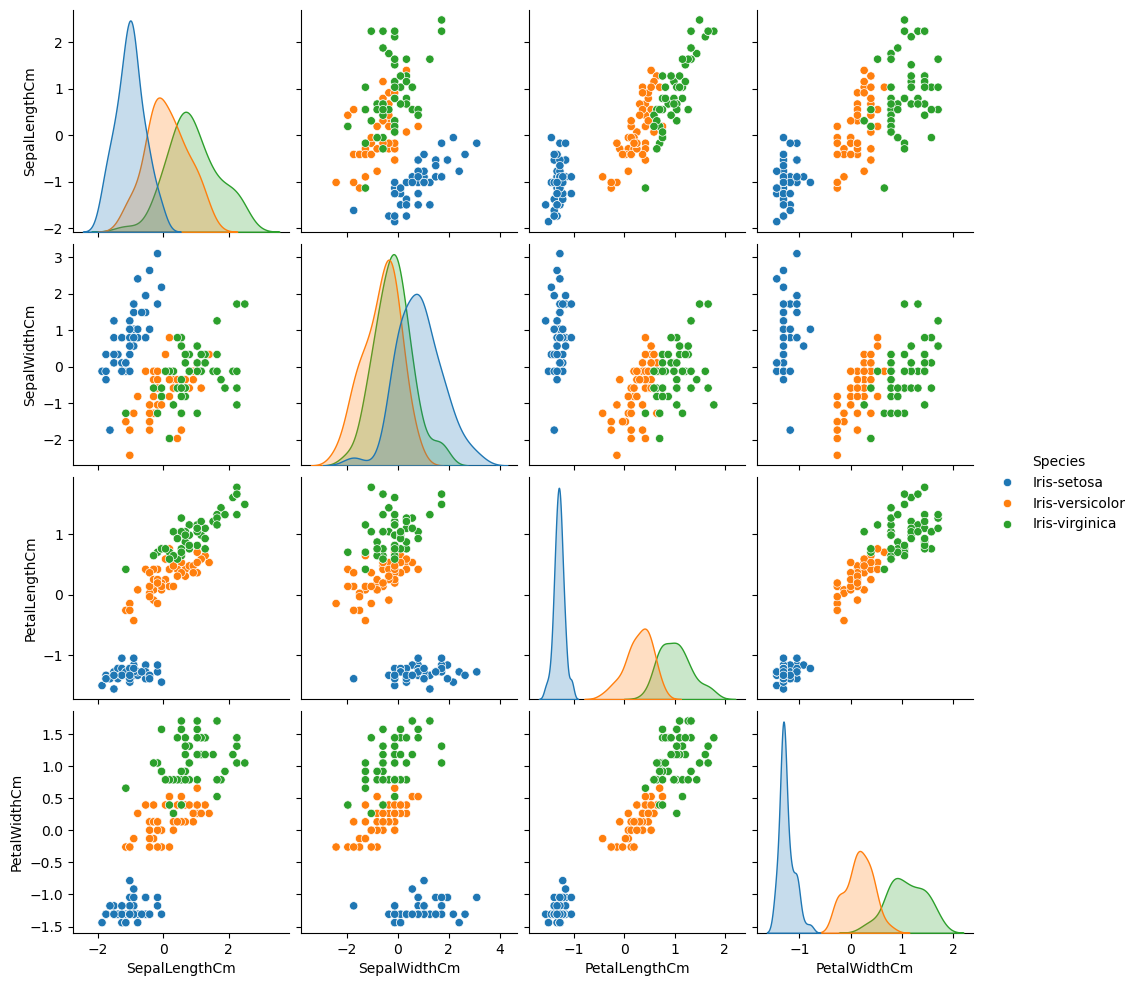

In [20]:
scatter_plot(iris_data, target_column='Species')

In [21]:
scatter_plot_3d_px(iris_data, target_column='Species')

In [22]:
explained_variance_px(iris_data.iloc[:, 0:4], n_components=4)

In [23]:
cumulative_variance_px(iris_data.iloc[:, 0:4], n_components=4)

### Apply PCA

#### n_components = 2

In [24]:
iris_data_pca = fit_transform(iris_data.iloc[:, 0:4], n_components=2)

In [25]:
iris_data_pca = pd.concat([iris_data_pca, iris_data['Species']], axis=1)

In [26]:
scatter_plot_2d_px(iris_data_pca, target_column='Species')

#### n_components = 3

In [27]:
iris_data_pca = fit_transform(iris_data.iloc[:, 0:4], n_components=3)

In [28]:
iris_data_pca = pd.concat([iris_data_pca, iris_data['Species']], axis=1)

In [29]:
scatter_plot_3d_px(iris_data_pca, target_column='Species')

## Wine dataset

In [21]:
data = load_csv('/Users/vominhthinh/Workspace/PCA from scratch/data/wine.csv')
data.head()

,Unnamed: 0,Genotypes,PruningBiomass,TimeofBudbrust,Timeoffullbloom,Time of verasion,ABW,BW,BD,BL,TSS,Acidity,Compaactness,Skinfirmness,Bunlen,pedunclelength,Physiologicalmaturity,Seed weight,NOS
0,0,(Gulabi X B’lore Purple),0.327667,9.000000,38.333333,105.000000,558.676667,104.800000,16.900000,18.233333,18.533333,0.566667,5.550000,60.966667,10.433333,32.933333,127.000000,4.203333,2.000000
1,1,Alden,2.137667,10.000000,35.333333,102.666667,262.866667,182.776667,15.523333,17.666667,18.656667,0.716667,8.446667,40.700000,14.156667,25.233333,116.666667,11.836667,2.000000
2,2,Aledo,0.912667,10.666667,39.666667,109.000000,124.340000,176.866667,21.333333,23.666667,18.090000,0.666667,5.560000,51.200000,15.776667,22.066667,141.666667,5.390000,2.333333
3,3,Amber Sweet,0.528667,10.000000,36.333333,99.333333,85.626667,137.363333,15.166667,17.600000,18.010000,0.553333,3.820000,38.233333,9.266667,10.953333,121.333333,4.030000,1.333333
4,4,Arka Chitra,1.075667,10.000000,35.000000,102.666667,317.273333,237.713333,18.766667,21.266667,16.943333,0.746667,2.793333,52.643333,17.633333,26.366667,127.333333,3.460000,1.666667


In [22]:
df = data.iloc[:, 1:]
df.head()

,Genotypes,PruningBiomass,TimeofBudbrust,Timeoffullbloom,Time of verasion,ABW,BW,BD,BL,TSS,Acidity,Compaactness,Skinfirmness,Bunlen,pedunclelength,Physiologicalmaturity,Seed weight,NOS
0,(Gulabi X B’lore Purple),0.327667,9.000000,38.333333,105.000000,558.676667,104.800000,16.900000,18.233333,18.533333,0.566667,5.550000,60.966667,10.433333,32.933333,127.000000,4.203333,2.000000
1,Alden,2.137667,10.000000,35.333333,102.666667,262.866667,182.776667,15.523333,17.666667,18.656667,0.716667,8.446667,40.700000,14.156667,25.233333,116.666667,11.836667,2.000000
2,Aledo,0.912667,10.666667,39.666667,109.000000,124.340000,176.866667,21.333333,23.666667,18.090000,0.666667,5.560000,51.200000,15.776667,22.066667,141.666667,5.390000,2.333333
3,Amber Sweet,0.528667,10.000000,36.333333,99.333333,85.626667,137.363333,15.166667,17.600000,18.010000,0.553333,3.820000,38.233333,9.266667,10.953333,121.333333,4.030000,1.333333
4,Arka Chitra,1.075667,10.000000,35.000000,102.666667,317.273333,237.713333,18.766667,21.266667,16.943333,0.746667,2.793333,52.643333,17.633333,26.366667,127.333333,3.460000,1.666667


### Restructering dataframe

In [23]:
target_column = df.iloc[:, 0]  # Lấy cột target
df = df.iloc[:, 1:]  # Lấy tất cả các cột trừ cột đầu tiên
df['Genotypes'] = target_column  # Thêm cột target vào cuối

In [24]:
df.head()

,PruningBiomass,TimeofBudbrust,Timeoffullbloom,Time of verasion,ABW,BW,BD,BL,TSS,Acidity,Compaactness,Skinfirmness,Bunlen,pedunclelength,Physiologicalmaturity,Seed weight,NOS,Genotypes
0,0.327667,9.000000,38.333333,105.000000,558.676667,104.800000,16.900000,18.233333,18.533333,0.566667,5.550000,60.966667,10.433333,32.933333,127.000000,4.203333,2.000000,(Gulabi X B’lore Purple)
1,2.137667,10.000000,35.333333,102.666667,262.866667,182.776667,15.523333,17.666667,18.656667,0.716667,8.446667,40.700000,14.156667,25.233333,116.666667,11.836667,2.000000,Alden
2,0.912667,10.666667,39.666667,109.000000,124.340000,176.866667,21.333333,23.666667,18.090000,0.666667,5.560000,51.200000,15.776667,22.066667,141.666667,5.390000,2.333333,Aledo
3,0.528667,10.000000,36.333333,99.333333,85.626667,137.363333,15.166667,17.600000,18.010000,0.553333,3.820000,38.233333,9.266667,10.953333,121.333333,4.030000,1.333333,Amber Sweet
4,1.075667,10.000000,35.000000,102.666667,317.273333,237.713333,18.766667,21.266667,16.943333,0.746667,2.793333,52.643333,17.633333,26.366667,127.333333,3.460000,1.666667,Arka Chitra


In [25]:
scatter_plot_3d(df, target_column='Genotypes')